# Matplotlib 基础

数据可视化非常重要，因为错误或不充分的数据表示方法可能会毁掉原本很出色的数据分析工作。

[matplotlib](https://matplotlib.org) 库是专门用于开发2D图表（包括3D图表）的，突出优点：

-   使用起来极为简单
-   以渐进、交互式方式实现数据可视化
-   表达式和文本使用LaTeX排版
-   对图像元素控制力强
-   可输出PNG、PDF、SVG和EPS等多种格式

## 安装
```sh
conda install matplotlib
```

或者

```sh
pip install matplotlib
```

## matplotlib 架构
matplotlib 的主要任务之一，就是提供一套表示和操作图形对象（主要对象）以及它的内部对象的函数和工具。其不仅可以处理图形，还提供事件处理工具，具有为图形添加动画效果的能力。有了这些附加功能，matplotlib 就能生成以键盘按键或鼠标移动触发的事件的交互式图表。

从逻辑上来讲，matplotlib 的整体架构为3层，各层之间单向通信：

-   Scripting （脚本）层
-   Artist （表现）层
-   Backend （后端）层

**matplotlib 3层架构**

![img](matplotlib-architecture.png)

### Backend 层

matplotlib API 即位于该层，这些 API 是用来在底层实现图形元素的一个个类。

-   FigureCanvas 对象实现了绘图区域这一概念。
-   Renderer 对象在 FigureCanvas 上绘图。
-   Event 对象处理用户输入（键盘和鼠标事件）。

使用 matplotlib 有很多种展示图形的方法。可以使用 IPython ，在命令行界面下，输入绘图命令，弹出绘图窗口，这是交互式展示形式；在 Jupyter QtConsole 窗口以行内形式显示图像；使用 Jupyter Notebook 绘制行内图形，实现高效数据分析；将 matplotlib 内嵌到 GUI 里构建应用程序等。

后端主要有两种类型：一种是交互式后端，主要有 Qt 、TkInter 、GTK 等；另一种是非交互式后端，主要包括 PNG 、SVG 、PDF 和 PS 等。

关于后端的介绍可参考[官方文档](https://matplotlib.org/3.2.1/tutorials/introductory/usage.html#the-builtin-backends)。


### Artist 层

图形中所有能看到的元素都属于 Artist 对象，即标题、轴标签、刻度等组成图形的所有元素都是 Artist 对象的实例。

Artist 类分为两种：原始（primitive）和复合（composite）。

绘制 Line2D 或矩形、圆形等几何图形，甚至文本等图形时，形成图形表示的基础元素由 primitive artist 单个对象组成。

由多个基础元素——primitive artist——组成的图表中的图像元素叫做 composite artist，例如 Axis（单条轴）、Ticks（刻度）、Axes（轴）和 Figure（图形）。

**matplotlib 图表组成元素**

![img](matplotlib_anatomy.png)


### Scripting层（pyplot）

Scripting 层对于数据分析和可视化最合适，该层包含 pyplot 接口。

两种接口方式：

-   显示地创建图表和轴等对象，通过对象调用方法（面向对象方式）
-   依靠 pyplot 自动地创建和管理图表和轴等对象，使用 pyplot 函数绘图

面向对象方式示例：

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 2, 100)

fig, ax = plt.subplots()
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend()

pyplot 方式示例：

In [ ]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

## pyplot

由一组命令式函数组成，通过 pyplot 函数操作或改动 Figure 对象，例如创建 Figure 对象和绘图区域、表示一条线或为图形添加标签等。

pyplot 还具有状态性特性，它能跟踪当前图形和绘图区域的状态。调用函数时，函数只对当前图形起作用。


### 简单交互式图表

In [ ]:
plt.plot([1, 2, 3, 4])  # Line2D 对象

In [ ]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro') # red circles
plt.axis([0,5,0,20])  # 定义轴的取值范围 [xmin, xmax, ymin, ymax]
plt.title('My first plot')
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

### 格式化字符串

格式化字符串包含 color 、marker 和 line 三部分：

```python
fmt = '[marker][line][color]'
```

每一个部分都是可选的。

**Markers**

| 字符       | 描述                   |
|------------|------------------------|
| `'.'`      | point marker           |
| `','`      | pixel marker           |
| `'o'`      | circle marker          |
| `'v'`      | triangle\_down marker  |
| `'^'`      | triangle\_up marker    |
| `'<'`      | triangle\_left marker  |
| `'>'`      | triangle\_right marker |
| `'1'`      | tri\_down marker       |
| `'2'`      | tri\_up marker         |
| `'3'`      | tri\_left marker       |
| `'4'`      | tri\_right marker      |
| `'s'`      | square marker          |
| `'p'`      | pentagon marker        |
| `'*'`      | star marker            |
| `'h'`      | hexagon1 marker        |
| `'H'`      | hexagon2 marker        |
| `'+'`      | plus marker            |
| `'x'`      | x marker               |
| `'D'`      | diamond marker         |
| `'d'`      | thin\_diamond marker   |
| `'&vert;'` | vline marker           |
| `'_'`      | hline marker           |

**Line 风格**

| 字符   | 描述                |
|--------|---------------------|
| `'-'`  | solid line style    |
| `'--'` | dashed line style   |
| `'-.'` | dash-dot line style |
| `':'`  | dotted line style   |

**Color**

| 字符  | 颜色    |
|-------|---------|
| `'b'` | blue    |
| `'g'` | green   |
| `'r'` | red     |
| `'c'` | cyan    |
| `'m'` | magenta |
| `'y'` | yellow  |
| `'k'` | black   |
| `'w'` | white   |

### 使用 NumPy

可以直接把 NumPy 数组作为输入数据。

In [3]:
import math
import numpy as np

t = np.arange(0, 2.5, 0.1)
y1 = list(map(math.sin, math.pi * t))
y2 = list(map(math.sin, math.pi * t + math.pi / 2))
y3 = list(map(math.sin, math.pi * t - math.pi / 2))

plt.plot(t, y1, 'b*',
         t, y2, 'g^',
         t, y3, 'ys')

ModuleNotFoundError: No module named 'matplotlib.pyplob'

In [ ]:
plt.plot(t, y1, 'b--',
         t, y2, 'g',
         t, y3, 'r-.')

### 使用 `kwargs`

组成图表的各个对象由很多用以描述它们特点的属性。这些属性均有默认值，但可以用关键字参数设置。

在 matplotlib 库各个函数的参考文档中，每个函数的最后一个参数总是<code>kwargs</code>。例如：

```
matplotlib.pyplot.plot(*args, **kwargs)
```

下面的例子，设置 linewidth 关键字参数，改变线条的粗细。

In [ ]:
plt.plot([1,2,4,2,1,0,1,2,1,4], linewidth=2.0)

### 处理多个Figure和Axes对象

用 matplotlib 同时管理多个图形，而在每个图形中，又可以绘制几个不同的子图。

使用 pyplot 时，必须时刻注意当前 Figure 对象和当前 Axes 对象的概念（即 Figure 对象中当前所显示的图形）。

<code>subplot()</code>函数不仅可以将图形分为不同的绘图区域，还能激活特定子图，以便用命令控制它。其用参数设置分区模式和当前子图。只有当前子图受到命令的影响。

下面的示例绘制两种正弦趋势图（正弦和余弦），将画布划分为上下两个向水平方向延伸的子图。


In [ ]:
t = np.arange(0, 5, 0.1)
y1 = np.cos(2 * np.pi * t)
y2 = np.sin(2 * np.pi * t)
plt.subplot(211)
plt.plot(t, y1, 'b-.')
plt.subplot(212)
plt.plot(t, y2, 'r--')

将图形分为左右两个子图。

In [ ]:
t = np.arange(0., 1., 0.05)
y1 = np.sin(2 * np.pi * t)
y2 = np.cos(2 * np.pi * t)
plt.subplot(121)
plt.plot(t, y1, 'b-.')
plt.subplot(122)
plt.plot(t, y2, 'r--')

### 为图表添加更多元素

#### 文本

-   使用<code>title()</code>函数添加标题
-   <code>xlabel()</code>和<code>ylabel()</code>用于添加轴标签，将要显示的文本以字符串形式传入

<code>text()</code>函数支持在图表任意位置添加文本：<code>text(x,y,s, fontdict=None, **kwargs)</code>。

In [ ]:
plt.axis([0,5,0,20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values', color='gray')
plt.text(1, 1.5,'First')
plt.text(2, 4.5,'Second')
plt.text(3, 9.5,'Third')
plt.text(4, 16.5,'Fourth')
plt.text(1.1, 12, r'$y = x^2$', fontsize=20, fontname='DejaVu Sans',
         bbox={'facecolor': 'yellow', 'alpha': 0.2})
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

#### 网格
添加网格能更好地理解图表每个数据点的位置。

直接在代码中加入<code>grid()</code>函数，传入参数<code>True</code>。

In [ ]:
plt.axis([0, 5, 0, 20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values', color='gray')
plt.text(1, 1.5,'First')
plt.text(2, 4.5,'Second')
plt.text(3, 9.5,'Third')
plt.text(4, 16.5,'Fourth')
plt.text(1.1, 12, r'$y = x^2$', fontsize=20,
         bbox={'facecolor': 'yellow', 'alpha': 0.2})
plt.grid(True) # 直接在图片中显示网格
plt.plot([1,2,3,4], [1,4,9,16], 'ro')

#### 图例
使用<code>legend()</code>函数将图例和字符串类型的图例说明添加到图表中。


In [ ]:
plt.axis([0,5,0,20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values', color='gray')
plt.text(1,1.5,'First')
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')
plt.text(1.1,12,r'$y = x^2$', fontsize=20,
         bbox={'facecolor': 'yellow', 'alpha': 0.2})
plt.grid(True)
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.legend(['First series'], loc=2)

**`loc` 参数可选设置**

| 位置字符串     | 位置编号 | 位置表述     |
|----------------|----------|--------------|
| 'best'         | 0        | 最佳位置     |
| 'upper right'  | 1        | 右上角       |
| 'upper left'   | 2        | 左上角       |
| 'lower left'   | 3        | 左下角       |
| 'lower right'  | 4        | 右下角       |
| 'right'        | 5        | 右侧         |
| 'center left'  | 6        | 左侧垂直居中 |
| 'center right' | 7        | 右侧垂直居中 |
| 'lower center' | 8        | 下方水平居中 |
| 'upper center' | 9        | 上方水平居中 |
| 'center'       | 10       | 正中间       |

注：5 和 7 表示的位置相同。

多个序列：

In [ ]:
plt.axis([0,5,0,20])
plt.title('My first plot', fontsize=20, fontname='Times New Roman')
plt.xlabel('Counting', color='gray')
plt.ylabel('Square values', color='gray')
plt.text(1,1.5,'First')
plt.text(2,4.5,'Second')
plt.text(3,9.5,'Third')
plt.text(4,16.5,'Fourth')
plt.text(1.1,12,r'$y = x^2$', fontsize=20,
         bbox={'facecolor': 'yellow', 'alpha': 0.2})
plt.grid(True)
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.plot([1,2,3,4],[0.8,3.5,8,15],'g^')
plt.plot([1,2,3,4],[0.5,2.5,4,12],'b*')
plt.legend(['First series', 'Second series', 'Third series'], loc=2)

### 保存图表为图片
使用<code>plt.savefig()</code>保存图表为图片，此函数接受一个字符串参数作为文件名。

注意：保存成图像的命令之前不要使用<code>plt.show()</code>，否则将得到空白图像。

### 处理日期值

In [ ]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

months = mdates.MonthLocator()
days = mdates.DayLocator()
timefmt = mdates.DateFormatter('%Y-%m')
events = [
    datetime.date(2015,1,23),
    datetime.date(2015,1,28),
    datetime.date(2015,2,3),
    datetime.date(2015,2,21),
    datetime.date(2015,3,15),
    datetime.date(2015,3,24),
    datetime.date(2015,4,8),
    datetime.date(2015,4,24)
]
readings = [12,22,25,20,18,15,17,14]
fig, ax = plt.subplots() #获取轴的对象
plt.plot(events, readings)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timefmt)
ax.xaxis.set_minor_locator(days)

## 线性图
绘制由数学函数生成的数据点，例如：

\begin{equation}
y = \frac{\sin(3 * x)}{x}  \nonumber
\end{equation}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
plt.plot(x, y)

### 显示一组函数的图像

\begin{equation}
y = \frac{\sin(n* x)}{x}   \nonumber
\end{equation}

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
y2 = np.sin(2 * x) / x
y3 = np.sin(4 * x) / x
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

matplotlib 会自动为每条线分配一种不同的颜色。
通过<code>plot()</code>函数的第三个参数指定线型、颜色，把这些设置所用的字符编码放到同一个字符串即可。

还可以使用两个单独的关键字参数，用<code>color</code>指定颜色，用<code>linestyle</code>指定线型。

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
y2 = np.sin(2 * x) / x
y3 = np.sin(4 * x) / x
plt.plot(x, y, 'k--', linewidth=3)
plt.plot(x, y2, 'c-.')
plt.plot(x, y3, color='#87a3cc', linestyle='--')

### 轴标签及刻度

使用<code>xticks()</code>和<code>yticks()</code>函数替换轴标签，分别为每个函数传入两列数值。第一个列表存储刻度的位置，第二个列表存储刻度的标签。

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
y2 = np.sin(2 * x) / x
y3 = np.sin(x) / x
plt.plot(x, y, 'b')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'g')
plt.xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
           [r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-1., 0, +1, +2, +3],
           [r'$-1$', r'$0$', r'$+1$', r'$+2$', r'$+3$'])

### 笛卡尔坐标轴

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
y2 = np.sin(2 * x) / x
y3 = np.sin(x) / x
plt.plot(x, y, 'b')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'g')
plt.xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
           [r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-1., 0, +1, +2, +3],
           [r'$-1$', r'$0$', r'$+1$', r'$+2$', r'$+3$'])
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

### 用注释和箭头标明曲线上某一数据点的位置

<code>annotate()</code>函数适合用于添加注释。

In [ ]:
x = np.arange(-2 * np.pi, 2 * np.pi, 0.01)
y = np.sin(3 * x) / x
y2 = np.sin(2 * x) / x
y3 = np.sin(x) / x
plt.plot(x, y, 'b')
plt.plot(x, y2, 'r')
plt.plot(x, y3, 'g')
plt.xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi],
           [r'$-2\pi$', r'$-\pi$', r'$0$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-1., 0, +1, +2, +3],
           [r'$-1$', r'$0$', r'$+1$', r'$+2$', r'$+3$'])
plt.annotate(r'$\lim_{x\to 0}\frac{\sin(x)}{x} = 1$', xy=[0,1],
             xycoords='data', xytext=[30,30], fontsize=16, textcoords='offset points',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))

## 直方图
直方图由竖立在 x 轴上的多个相邻的矩形组成。这些矩形把 x 轴拆分成一段段彼此不重叠的线段（线段两个端点所标识的数据范围也叫面元），矩形的面积跟落在其所对应的面元的元素数量成正比。这种可视化方法常用于样本分布等统计研究。

pyplot 用于绘制直方图的函数为<code>hist()</code>，它除了绘制直方图外，还以元组形式返回直方图的计算结果。实际上，<code>hist()</code>函数还可以实现直方图的计算。其能接收一系列样本个体和期望的面元数量作为参数，会把样本范围分为多个区间（面元），然后计算每个面元所包含的样本个体的数量。



box height: [7 1 2 4 7 4 4 2 9 2 9 7 8 2 8 2 7 3 6 3 3 1 7 3 4 8 6 8 4 9 1 5 1 1 0 0 2
 9 6 1 2 7 2 6 1 7 5 6 1 8 1 3 1 2 0 8 0 3 6 7 4 0 1 5 1 8 1 5 4 1 9 6 9 5
 9 8 9 2 9 5 1 5 0 4 5 9 0 1 2 5 6 6 7 8 0 0 8 5 9 4]
n: [ 9. 16. 11.  6.  9. 10.  9.  9. 10. 11.] 
bins: [ 0  1  2  3  4  5  6  7  8  9 10] 
patches: <a list of 10 Patch objects>


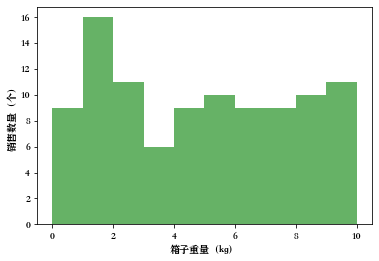

In [5]:
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['Songti SC']  # SimHei

box_weight = np.random.randint(0, 10, 100)  # 生成100个 0-10 的随机数作为样本

print('box height:', box_weight)
n, bins, patches = plt.hist(box_weight, bins=range(0, 11, 1),
                            color='g',
                            histtype='bar',
                            rwidth=1,
                            alpha=0.6)
plt.xlabel('箱子重量（kg）')
plt.ylabel('销售数量（个）')
print('n:', n, '\nbins:', bins, '\npatches:', patches)

## 条状图

跟直方图很相似，但是 $x$ 轴表示的不是数值而是类别。


([<matplotlib.axis.XTick at 0x7fe1d959eb50>,
 <a list of 5 Text xticklabel objects>)

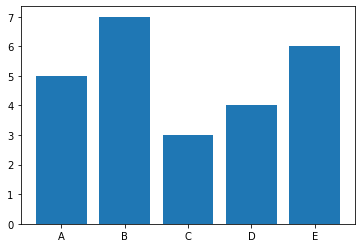

In [4]:
import matplotlib.pyplot as plt
import numpy as np

index = np.arange(5)
values = [5,7,3,4,6]
plt.bar(index, values)
plt.xticks(index, ['A', 'B', 'C', 'D', 'E'])